# Experiment Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Result per Task

### English

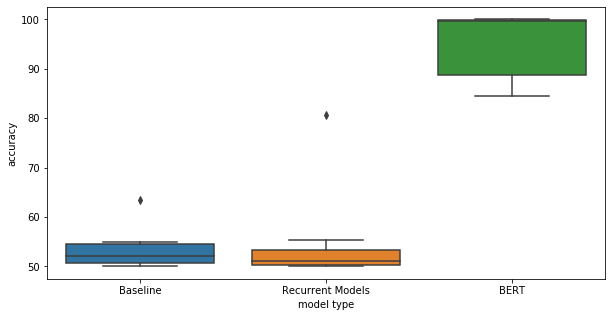

In [16]:
baseline = [52.1, 50.7, 50.5, 63.5, 50.0, 54.9, 54.1]
rnn = [50.0, 50.1, 50.2 ,50.0, 50.1 ,84.4 ,50.0]
gru = [50.4, 50.1, 52.7, 66.1 , 50.0, 82.7, 53.1]
lstm = [50.4, 50.8, 51.3 , 50.1 , 50.0, 75.1 , 50.0]
bert = [99.7, 100, 100, 84.4, 99.7, 87.5, 90.0]
index = ["task1", "task2", "task4", "task3", "task5", "task6", "task7"]
results_eng = np.stack([baseline, rnn, gru, lstm, bert]).T
columns = ["Baseline", "RNN", "GRU", "LSTM", "BERT"]
df_eng = pd.DataFrame(results_eng,columns=columns,  index=index).sort_index()

df_eng.loc[:,"Recurrent Models"] = df_eng.iloc[:,1:4].mean(1)
df = df_eng[["Baseline", "Recurrent Models", "BERT"]]
df = pd.melt(df).rename(columns={"variable":"model type", "value":"accuracy"})

ax, fig = plt.subplots(figsize=(10,5))
sns.boxplot(x="model type", y="accuracy", data=df);

### Portuguese

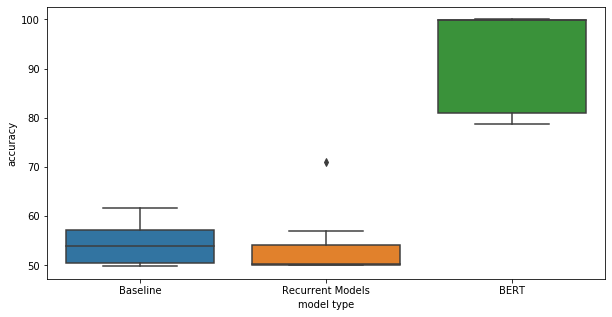

In [15]:
baseline = [53.9, 49.8, 50.9, 61.7, 49.9, 58.9, 55.4]
rnn = [50.1, 50.0, 50.0, 50.0, 50.1, 66.4, 51.6]
gru = [50.2, 50.0, 50.4, 70.6, 50.8, 79.7, 51.6]
lstm = [50.0, 50.0, 50.0, 50.1, 50.0, 67.2, 51.1]
bert = [99.9, 99.9, 100, 78.7, 99.8, 79.1, 82.7]

index = ["task1", "task2", "task4", "task3", "task5", "task6", "task7"]
results_pt = np.stack([baseline, rnn, gru, lstm, bert]).T
columns = ["Baseline", "RNN", "GRU", "LSTM", "BERT"]
df_pf = pd.DataFrame(results_pt,columns=columns,  index=index).sort_index()
df_pf.loc[:,"Recurrent Models"] = df_pf.iloc[:,1:4].mean(1)

df = df_pf[["Baseline", "Recurrent Models", "BERT"]]
df = pd.melt(df).rename(columns={"variable":"model type", "value":"accuracy"})

ax, fig = plt.subplots(figsize=(10,5))
sns.boxplot(x="model type", y="accuracy", data=df);

## Using different pre-trained versions of BERT

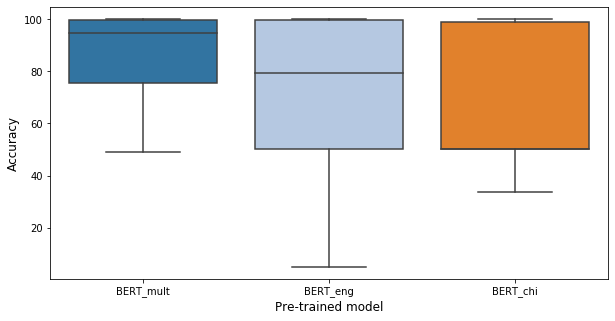

In [28]:
results = {}

# chi -> pt 

SN = [50.0, 50.0, 99.2, 98.7, 99.4, 99.4, 98.7, 99.3, 33.5, 99.4]
BC = [50.0, 50.0, 50.0, 99.3, 99.6, 99.5, 50.0, 99.4, 99.4, 99.5]
DD = [50.0, 50.0, 50.0,99.9, 99.8, 99.7, 99.9, 99.8, 100,100]
Q = [50]*7 + [62, 76.1, 50.0]
Comp = [50]*7  + [49.6, 50.0, 50]
Count = [50, 64.6, 50, 65, 50, 50, 71.3, 66.7, 75.1, 68.9]
M = [51.1, 48.9, 51.1, 51.1, 51.1, 54.3, 51.1, 48.9, 48.9, 48.9]

bert_chi =np.stack([SN, BC, Q, DD, Comp, Count, M])
results["BERT_chi"] = bert_chi.flatten()

# eng -> pt

SN = [50.0, 50.0, 99.7, 99.9, 50.0, 99.9, 99.8, 99.9, 99.9, 99.9]
BC = [99.4, 99.7, 50.0, 99.8, 99.9, 99.8, 99.9, 99.9, 99.9, 99.9]
DD = [50.0, 50.0, 50.0, 99.3, 100, 50.0, 100, 100, 50.0,100]
Q = [50.0, 5.0, 62.5, 62.7, 82.9, 79.1, 80.6, 79.8, 62.5, 78.7]
Comp = [50.0]*5 +[99.8, 99.6,99.0, 100, 99.8]
Count = [68.1, 72.2, 75.1, 79.5, 74.8, 75.5, 74.9, 76.0, 79.4, 79.1]
M = [48.9, 48.9, 51.1, 51.1, 83.0, 79.6, 51.1, 81.9, 83.5, 82.7]

bert_eng =np.stack([SN, BC, Q, DD, Comp, Count, M])
results["BERT_eng"] = bert_eng.flatten()

# multi -> pt 
SN = [98.8, 99.5, 50.0, 99.9, 99.7, 99.9, 100, 100, 100, 100]
BC = [50.0, 50.0, 99.9, 100, 100, 100, 99.7, 100, 100, 99.9]
DD = [99.7, 100, 99.8] + [100]*7
Q = [73.9, 62.9, 73.2, 74.2, 75.4, 78.7, 75.4, 77.9, 79.5, 75.4]
Comp = [79.5, 98.6, 93.0,99.7, 99.2, 99.2, 96.3, 100, 99.8, 99.5]
Count = [64.6, 76.6, 67.6, 66.3, 50.0, 71.8, 81.4, 87.4, 77.7, 82.4]
M = [48.9, 51.0, 51.1, 88.3, 83.6, 82.6, 63.6, 85.9, 92.8, 90.3]

bert_mult =np.stack([SN, BC, Q, DD, Comp, Count, M])
results["BERT_mult"] = bert_mult.flatten()

df = pd.DataFrame(results)
df = df[["BERT_mult", "BERT_eng", "BERT_chi"]]
df = pd.melt(df).rename(columns={"variable":"Pre-trained model", "value":"Accuracy"})

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Pre-trained model", y="Accuracy", data=df, palette="tab20");
ax.set_xlabel("Pre-trained model", fontsize=12);
ax.set_ylabel("Accuracy", fontsize=12);
plt.savefig("acc_box_plot_tasks_pt.png")